## Project #5: Survival Analysis: Cox Proportional Hazards Regression and Kaplan Meier Analysis

Lillian Jensen

**Goal**

Students will use R to conduct and interpret a Cox Proportional Hazards Regression and Kaplan Meier Analyses and compare the results. 

Note: We are using data from the Framingham Heart Study for this analysis.  Framingham is one of the longest running longitudinal studies following the same population for several decades.  You can access more about the study [here](https://www.framinghamheartstudy.org/)  if you wish to learn more about it.

In this problem set, you will be comparing Kaplan Meier Analysis results with the Cox Regression results.


---

## Part 1

Run a Cox Proportional Hazards Regression using the following variables from the dataset: TimeDeathYears as the “Time” variable. Death as the “Status” variable.  Use cursmoke, diabetes, educ, prevchd, age, bmi, and sex as the covariates.  For the categorical variables, make sure that not a current smoker, no diabetes, the lowest education category, no CHD, and female sex are all reference categories (All of these are the lowest coded values for each). As a refresher:

Import your data, account for missing values if necessary, determine which variables are categorical (see the codebook). For categorical variables, remember to convert them to factor variables


    > data$IV1 <- factor(data$IV1)

where data is whatever you name your data. This only specifies the variable as categorical. If you want to (YOU WANT TO) also include category labels (which is handy when creating plots and legends for plots), create a new factor variable for each:

    > data$IV1_factor <- factor(data$IV, levels = c(0, 1, 2, …, n), labels = "Label1", "Label2", Label3”, ... “Labeln”)

Remember to detach and attach your data.

For any categorical variable that has more than two levels, you will need to create indicator variables so that R knows which level you want to be the reference category. For example, for a categorical independent variable (IV) with 4 levels (coded, 1, 2, 3, 4), and you want to the first level to be the reference category:

    > IV_Name_2 <- as.numeric(IV == 2)
    > IV_Name_3 <- as.numeric(IV == 3)
    > IV_Name_4 <- as.numeric(IV == 4)

    > library(survival)

    > cox_model <- coxph(Surv(Time to Event Variable, Event Status Variable) ~ IV1 + IV2 + IV3 +…+ IVn)

    > summary(cox_model)

Here, you get hazard rations, p-values, etc.

Create a survival curve with diabetes as the grouping variable- survfit() function.

    > survival_curves <- survfit(Surv(Time to Event Variable, Event Status Variable) ~ Grouping Variable)

Plot the curve.

    > plot(survival_curves, xlab = "x-axis label", ylab = "y-axis label", main = "main title", col = c("color1", "color2", “color…”, “color4”), lwd = 2, conf.int = TRUE)

lwd = 2 is the width of the lines on the graph. You can change that. conf.int=TRUE tells R to include lines for the confidence intervals (you can switch it to FALSE if you don’t want those).

    > legend("bottomright", legend = levels(data$Grouping_IV_Factor_Variable), col = c("color1", "color2"), lwd = 2)

“bottomright” can be changed to “bottomleft” or “topright” or “topleft” depending on where you want your legend. The colors you choose should be the same as the colors on the plot syntax line.

This is what you get:


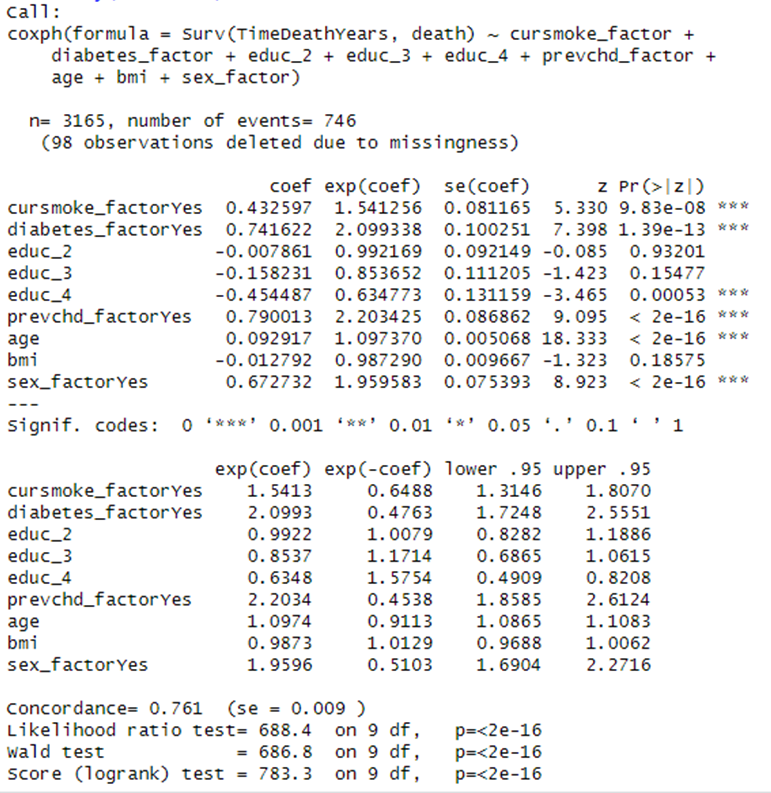

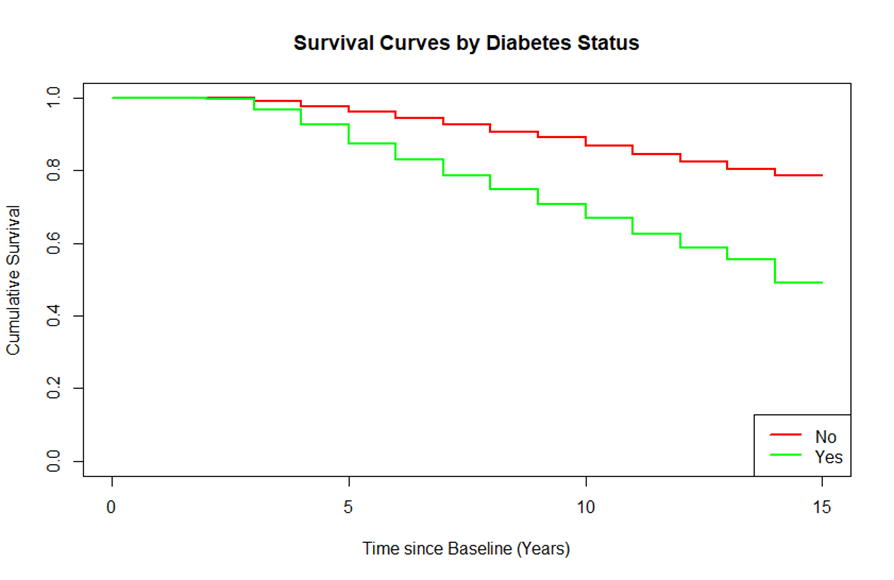

1. Fully interpret the hazard ratios for each IV (p-values, HR, and 95% HR are boxed on the table above) and the survival curve.

---

## Part 2

Run Kaplan Meier analyses with “Time Since Baseline” as the Time to Event variable, and death as the Event Status Variable.  Run five separate analyses (survival curves) with each of the categorical variables as the “Factor” variable. You can only include one IV at a time, so you’ll need to run it five times (one for each IV) to get the results. You can’t used this procedure for the continuous numerical variables (age, bmi).


    > MODEL_NAME <- survfit(Surv(Time to Event Variable, Event Status Variable) ~ Grouping_IV_Factor_Variable, data = data)

    > plot(MODEL_NAME, col = c(“color1”, “color2”), lwd = 2, main = "Kaplan-Meier Survival Curve by Grouping IV", xlab = "Time", ylab = "Survival Probability")

The number of colors you choose should be the same as the number of levels ion your IV.

    > legend("bottomright", legend = levels(data$Grouping_IV_Factor_Variable), col = c("color1", "color2"), lwd = 2)

“bottomright” can be changed to “bottomleft” or “topright” or “topleft” depending on where you want your legend. The colors you choose should be the same as the colors on the plot syntax line.

---

1. For each Kaplan Meier Analysis:

    • Interpret the summary: 

        > print(MODEL_NAME)

    • Calculate and interpret the mean survival time: 

        > print(MODEL_NAME, print.rmean = TRUE)

    • Calculate and interpret the median survival time: 

        > quantile(MODEL_NAME, probs = c(0.5))

    • Calculate and interpret the Log Rank Mantel-Cox Test

        > log_rank_test_IV <- survdiff(Surv(Time to Event Variable, Event Status Variable) ~ IV, data = data)

        > print(log_rank_test_IV)

    • Survival Curves – estimate survival probability at 10 years for each group in the respective plots.

    • Compare and contrast these results for each of the categorical variables.


---

2. Compare and contrast the “Log Rank Mantel-Cox Test” for each Kaplan Meier analysis to the model fit statistics from the Cox Proportional Hazards Regression Do the results from each align with each other? Describe why or why not. In other words, are the results you get from one expected, based on the results of the other?


---

3. Finally, describe situations when you would use these two analyses. When would you use a Cox Regression and when would you use a Kaplan Meier analysis? Is one better than the other?